# Introduction

The purpose of this project is to examine crime data in Los Angeles. The data comes from the lacity's website. The dataset reflects incidents of crime in the City of Los Angeles dating back to 2010. The dataset is available via API.

Questions I will be examined
1. Are certain areas more prone to crimes?
2. Are there certain times where more crimes are occuring?
3. Are there subpopulations which are more often targets of crime?
4. What weapons are most often used

In [1]:
#Import relevant packages
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Call API and investigate the structure
r = requests.get('https://data.lacity.org/resource/7fvc-faax.json')
json_data = r.json()
print(type(json_data))
print((json_data[0]))

<class 'list'>
{':@computed_region_2dna_qi2s': '76', ':@computed_region_k96s_3jcv': '537', ':@computed_region_kqwf_mjcx': '9', ':@computed_region_qz3q_ghft': '23082', ':@computed_region_tatf_ua23': '1018', 'area_id': '01', 'area_name': 'Central', 'crm_cd': '821', 'crm_cd_1': '821', 'crm_cd_desc': 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02', 'cross_street': 'SAN PEDRO', 'date_occ': '2010-11-15T00:00:00.000', 'date_rptd': '2010-11-16T00:00:00.000', 'dr_no': '100120235', 'location': '7TH', 'location_1': {'type': 'Point', 'coordinates': [-118.2459, 34.0401]}, 'mocodes': '0519 0540 0537', 'premis_cd': '102', 'premis_desc': 'SIDEWALK', 'rpt_dist_no': '0157', 'status': 'AO', 'status_desc': 'Adult Other', 'time_occ': '2045', 'vict_age': '30', 'vict_descent': 'H', 'vict_sex': 'M', 'weapon_desc': 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'weapon_used_cd': '400'}


In [3]:
#Convert list of dictionaries into a pandas dataframe
crime_df = pd.DataFrame(json_data)
print(crime_df.head())

  :@computed_region_2dna_qi2s :@computed_region_k96s_3jcv  \
0                          76                         537   
1                          67                         549   
2                          23                         887   
3                          26                         626   
4                          26                         635   

  :@computed_region_kqwf_mjcx :@computed_region_qz3q_ghft  \
0                           9                       23082   
1                           8                       23444   
2                          12                       23451   
3                           7                       23667   
4                           7                       23667   

  :@computed_region_tatf_ua23 :@computed_region_ur2y_g4cx area_id area_name  \
0                        1018                         NaN      01   Central   
1                         942                         NaN      02   Rampart   
2                        1102

In [4]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
:@computed_region_2dna_qi2s    972 non-null object
:@computed_region_k96s_3jcv    980 non-null object
:@computed_region_kqwf_mjcx    985 non-null object
:@computed_region_qz3q_ghft    991 non-null object
:@computed_region_tatf_ua23    989 non-null object
:@computed_region_ur2y_g4cx    180 non-null object
area_id                        1000 non-null object
area_name                      1000 non-null object
crm_cd                         1000 non-null object
crm_cd_1                       1000 non-null object
crm_cd_2                       172 non-null object
crm_cd_3                       2 non-null object
crm_cd_desc                    1000 non-null object
cross_street                   193 non-null object
date_occ                       1000 non-null object
date_rptd                      1000 non-null object
dr_no                          1000 non-null object
location             

In [5]:
#Drop columns with more than 70% of the data missing and coding columns
crime_df= crime_df[[column for column in crime_df if crime_df[column].count() / len(crime_df) >= 0.3]]
crime_df = crime_df.drop([':@computed_region_2dna_qi2s', ':@computed_region_k96s_3jcv', ':@computed_region_kqwf_mjcx', ':@computed_region_qz3q_ghft', ':@computed_region_tatf_ua23'],1)
crime_df = crime_df.drop(['crm_cd_1'], 1)
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
area_id           1000 non-null object
area_name         1000 non-null object
crm_cd            1000 non-null object
crm_cd_desc       1000 non-null object
date_occ          1000 non-null object
date_rptd         1000 non-null object
dr_no             1000 non-null object
location          1000 non-null object
location_1        1000 non-null object
mocodes           972 non-null object
premis_cd         1000 non-null object
premis_desc       1000 non-null object
rpt_dist_no       1000 non-null object
status            1000 non-null object
status_desc       1000 non-null object
time_occ          1000 non-null object
vict_age          928 non-null object
vict_descent      993 non-null object
vict_sex          993 non-null object
weapon_desc       677 non-null object
weapon_used_cd    677 non-null object
dtypes: object(21)
memory usage: 164.1+ KB


In [6]:
#Fill Premis Descriptions for which their is already a description assigned to a code
premise_codes = crime_df.premis_cd.unique()
premise = crime_df.premis_desc.unique()
premise_dict = dict(zip(premise_codes, premise))
crime_df.premis_desc = crime_df.premis_desc.fillna(crime_df.premis_cd.map(premise_dict))
print(crime_df[crime_df['premis_desc'].isnull()]['premis_cd'])
print(premise_dict['516'])

Series([], Name: premis_cd, dtype: object)
SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS


In [7]:
print(crime_df.head())

  area_id area_name crm_cd                                        crm_cd_desc  \
0      01   Central    821  SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...   
1      02   Rampart    810  SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...   
2      07  Wilshire    626                  INTIMATE PARTNER - SIMPLE ASSAULT   
3      07  Wilshire    930             CRIMINAL THREATS - NO WEAPON DISPLAYED   
4      07  Wilshire    626                  INTIMATE PARTNER - SIMPLE ASSAULT   

                  date_occ                date_rptd      dr_no  \
0  2010-11-15T00:00:00.000  2010-11-16T00:00:00.000  100120235   
1  2010-03-01T00:00:00.000  2010-05-19T00:00:00.000  100211716   
2  2010-11-15T00:00:00.000  2010-11-15T00:00:00.000  100700184   
3  2010-03-12T00:00:00.000  2010-03-12T00:00:00.000  100700660   
4  2010-03-13T00:00:00.000  2010-03-13T00:00:00.000  100700661   

                                  location  \
0                                      7TH   
1  1600 W  3RD          

In [8]:
#To begin I would like to see the different types of crime
crime_df.groupby('crm_cd_desc').area_name.count().sort_values(ascending=False).head(10)

crm_cd_desc
INTIMATE PARTNER - SIMPLE ASSAULT                 157
BATTERY - SIMPLE ASSAULT                          115
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    113
CRIMINAL THREATS - NO WEAPON DISPLAYED             99
INTIMATE PARTNER - AGGRAVATED ASSAULT              35
VIOLATION OF RESTRAINING ORDER                     34
ROBBERY                                            31
BURGLARY                                           28
RAPE, FORCIBLE                                     23
SHOPLIFTING - PETTY THEFT ($950 & UNDER)           22
Name: area_name, dtype: int64

{'01': 'Central', '02': 'Rampart', '07': 'Wilshire', '08': 'West LA', '20': 'Olympic', '03': 'Southwest', '09': 'Van Nuys', '16': 'Foothill', '18': 'Southeast', '21': 'Topanga', '10': 'West Valley', '12': '77th Street', '13': 'Newton', '15': 'N Hollywood', '04': 'Hollenbeck', '05': 'Harbor', '06': 'Hollywood', '17': 'Devonshire', '11': 'Northeast', '14': 'Pacific', '19': 'Mission'}


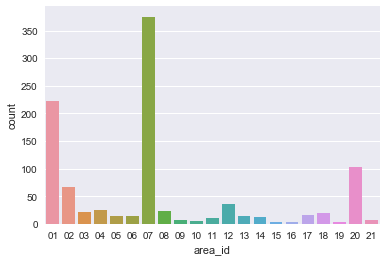

In [9]:
#Investigate where crimes are more likely to occur
area_ids = crime_df.area_id.unique()
area_names = crime_df.area_name.unique()
area_dict = dict(zip(area_ids, area_names))
print(area_dict)
sns.set(style="darkgrid")
ax = sns.countplot(x='area_id', data = crime_df)

Area 7 has the highest number of crimes by far. Looking at the dictionary we see that area 7 corresponds to the area name Wilshire. Wilshire is a prominent boulevard that goes east and west through Los Angeles. It seems that the area name Wilshire corresponds to crimes that occur at or near this major street. Wilshire is a major hub for transportation with many buses and subways that run along it. This combined with the fact that many people live along this street contribute to the fact that many crimes occur here.
Other noteworthy high crime counts are Hollywood, Southwest, and Central.
The lowest crime count corresponds with the area Harbor

I believe these crime counts are heavily influenced by the population density of each area

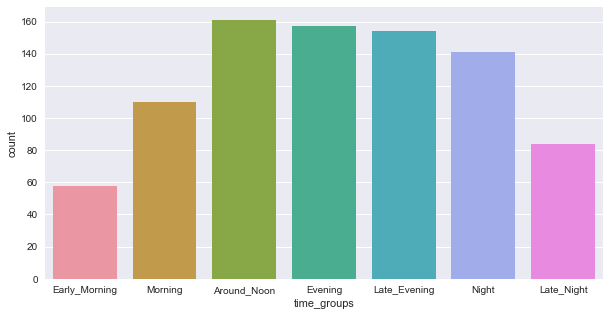

In [10]:
#Put the time crimes occur into buckets
crime_df['time'] = pd.to_numeric(crime_df['time_occ'])
def label_time(row):
    if 500 <= row < 800:
        return 'Early_Morning'
    elif 800 <= row < 1100:
        return 'Morning'
    elif 1100 <= row < 1400:
        return 'Around_Noon'
    elif 1400 <= row < 1700:
        return 'Late_Afternoon'
    elif 1700 <= row < 2000:
        return 'Evening'
    elif 2000 <= row < 2300:
        return 'Late_Evening'
    elif 2300 <= row <= 2400 or 0 <= row < 200:
        return 'Night'
    elif 200 <= row < 500:
        return 'Late_Night'
    else:
        return 'Other'
crime_df['time_groups'] = crime_df['time'].apply(label_time)
plt.figure(figsize=(10,5))
axis = sns.countplot(x = 'time_groups', data = crime_df, order = ['Early_Morning', 'Morning', 'Around_Noon', 'Evening', 'Late_Evening', 'Night', 'Late_Night'])

In [11]:
#Convert age to numerics and see the description of the age column
crime_df['age'] = pd.to_numeric(crime_df['vict_age'])
print(crime_df['age'].describe())

count    928.000000
mean      36.780172
std       15.329645
min       10.000000
25%       25.000000
50%       34.000000
75%       46.000000
max       95.000000
Name: age, dtype: float64


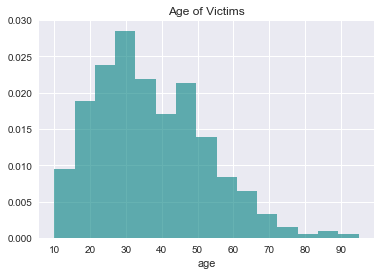

In [12]:
#Examine the distribution of age for victims
plt.xlabel('age')
plt.title('Age of Victims')
plt.xticks(range(0, 100, 10))
plt.hist(crime_df['age'].dropna(), bins=15, density = True, stacked = True, color = 'teal', alpha = .6)
plt.show()

From this histogram we can see that the portion of the population that are the most victimized are teenagers and the risk of victimization appears to drop as individuals get older.

In [13]:
counts = crime_df.groupby(['vict_descent', 'vict_sex'])['crm_cd'].count().unstack('vict_sex').fillna(0)
print(counts)

vict_sex          F      M     X
vict_descent                    
A              21.0   11.0   0.0
B             146.0  107.0   0.0
H             239.0  139.0   0.0
K              14.0    4.0   0.0
O              38.0   58.0   0.0
W              85.0  109.0   0.0
X               0.0   10.0  12.0


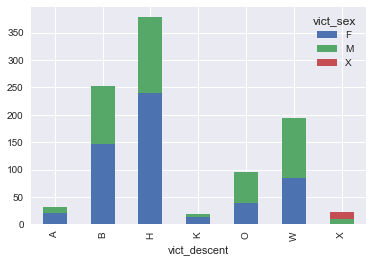

In [14]:
counts[['F', 'M', 'X']].plot(kind='bar', stacked = True)

Victims are more likely to be hispanic, white, or black. The counts of male and female victims are roughly equal with there being slightly more males.

{'400': 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', nan: nan, '511': 'VERBAL THREAT', '500': 'UNKNOWN WEAPON/OTHER WEAPON', '200': 'KNIFE WITH BLADE 6INCHES OR LESS', '308': 'STICK', '102': 'HAND GUN', '212': 'BOTTLE', '307': 'VEHICLE', '111': 'STARTER PISTOL/REVOLVER', '106': 'UNKNOWN FIREARM', '207': 'OTHER KNIFE', '109': 'SEMI-AUTOMATIC PISTOL', '306': 'ROCK/THROWN OBJECT', '104': 'SHOTGUN', '122': 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE', '503': 'CAUSTIC CHEMICAL/POISON', '304': 'CLUB/BAT', '219': 'SCREWDRIVER', '101': 'REVOLVER', '113': 'SIMULATED GUN', '218': 'OTHER CUTTING INSTRUMENT', '206': 'SWITCH BLADE', '108': 'AUTOMATIC WEAPON/SUB-MACHINE GUN', '205': 'KITCHEN KNIFE', '504': 'DEMAND NOTE', '513': 'STUN GUN', '512': 'MACE/PEPPER SPRAY', '507': 'LIQUOR/DRUGS', '216': 'SCISSORS', '515': 'PHYSICAL PRESENCE', '115': 'ASSAULT WEAPON/UZI/AK47/ETC', '309': 'BOARD', '221': 'GLASS', '204': 'FOLDING KNIFE', '312': 'PIPE/METAL PIPE', '103': 'RIFLE', '302': 'BLUNT INSTRUME

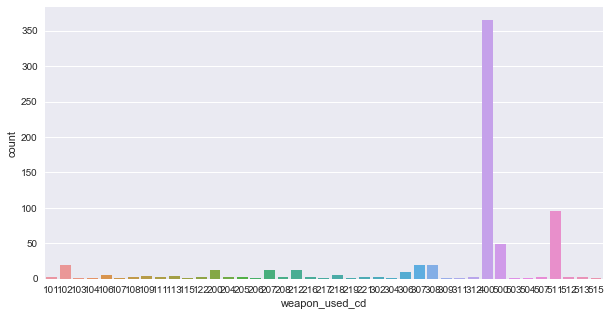

In [15]:
weapon_cds = crime_df.weapon_used_cd.unique()
weapon_names = crime_df.weapon_desc.unique()
weapon_dict = dict(zip(weapon_cds, weapon_names))
weapon_cd = crime_df['weapon_used_cd'].dropna()
plt.figure(figsize=(10,5))
print(weapon_dict)
ax = sns.countplot(x=weapon_cd, data = crime_df)

In [16]:
print(crime_df['date_occ'].head())

0    2010-11-15T00:00:00.000
1    2010-03-01T00:00:00.000
2    2010-11-15T00:00:00.000
3    2010-03-12T00:00:00.000
4    2010-03-13T00:00:00.000
Name: date_occ, dtype: object
